1. Import and Install Dependencies


In [1]:
%pip install opencv-python mediapipe matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\SSN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import cv2
import mediapipe as mp
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd

2. Keypoints using MP Holistic


In [3]:
mp_holistic = mp.solutions.holistic  # Holistic model
mp_drawing = mp.solutions.drawing_utils  # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    # COLOR CONVERSION BGR 2 RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks,
                              mp_holistic.FACEMESH_CONTOURS)  # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks,
                              mp_holistic.POSE_CONNECTIONS)  # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks,
                              mp_holistic.HAND_CONNECTIONS)  # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks,
                              mp_holistic.HAND_CONNECTIONS)  # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(
                                  color=(80, 110, 10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(
                                  color=(80, 256, 121), thickness=1, circle_radius=1)
                              )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(
                                  color=(80, 22, 10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(
                                  color=(80, 44, 121), thickness=2, circle_radius=2)
                              )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(
                                  color=(121, 22, 76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(
                                  color=(121, 44, 250), thickness=2, circle_radius=2)
                              )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(
                                  color=(245, 117, 66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(
                                  color=(245, 66, 230), thickness=2, circle_radius=2)
                              )

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
draw_landmarks(frame, results)

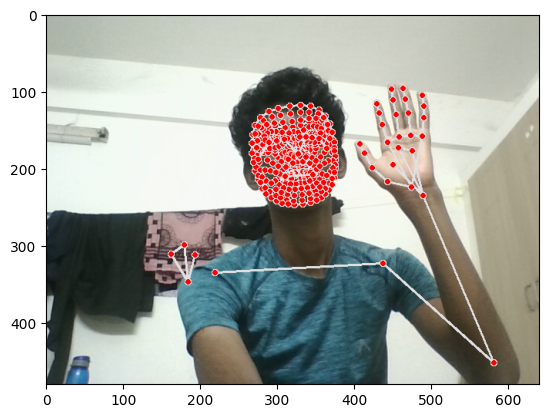

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

3. Extract Keypoint Values


In [12]:
if results.left_hand_landmarks:
    num_landmarks = len(results.left_hand_landmarks.landmark)
    print(f"Number of left hand landmarks: {num_landmarks}")
else:
    print("Left hand landmarks not detected in this frame.")

Number of left hand landmarks: 21


In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]
                ).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]
                ).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]
              ).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]
              ).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
face = (
    np.array([[res.x, res.y, res.z]
             for res in results.face_landmarks.landmark]).flatten()
    if results.face_landmarks
    else np.zeros(1404)
)

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten(
    ) if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten(
    ) if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten(
    ) if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten(
    ) if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.51192063,  0.37818679, -0.42151207, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.51192063,  0.37818679, -0.42151207, ...,  0.        ,
        0.        ,  0.        ])

4. Setup Mongodb for Collection


In [21]:
import cv2
import mediapipe as mp
import numpy as np
import os
import pymongo
from datetime import datetime

# Connect to MongoDB (Make sure MongoDB is running on your machine)
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["sign_language_data"]

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Function to save keypoints to MongoDB


def save_to_mongodb(action, sequence, frame_num, keypoints):
    collection = db[action]
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    data = {
        "action": action,
        "sequence": sequence,
        "frame_num": frame_num,
        "keypoints": keypoints.tolist(),
        "timestamp": timestamp
    }
    collection.insert_one(data)

# Function to retrieve keypoints from MongoDB


def retrieve_from_mongodb(action, sequence, frame_num):
    collection = db[action]
    query = {"action": action, "sequence": sequence, "frame_num": frame_num}
    result = collection.find_one(query)
    if result:
        return np.array(result["keypoints"])
    else:
        return None


# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

5. Collect Keypoint Values for Training and Testing


In [22]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)

                # NEW Apply wait logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(
                        action, sequence), (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(
                        action, sequence), (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                print(keypoints)
                # save_to_mongodb(action, sequence, frame_num, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

[ 0.50000989  0.43299991 -0.58421117 ...  0.          0.
  0.        ]
[ 0.50018114  0.4330146  -0.59082115 ...  0.          0.
  0.        ]
[ 0.50051296  0.43300626 -0.59782571 ...  0.          0.
  0.        ]
[ 0.50452346  0.43302569 -0.63279754 ...  0.          0.
  0.        ]
[ 0.50720173  0.43113178 -0.6250118  ...  0.          0.
  0.        ]
[ 0.50940812  0.42365795 -0.62125278 ...  0.          0.
  0.        ]
[ 0.51138979  0.42231768 -0.61833853 ...  0.          0.
  0.        ]
[ 0.51281464  0.41053548 -0.60828292 ...  0.          0.
  0.        ]
[ 0.51630437  0.4029676  -0.60760534 ...  0.          0.
  0.        ]
[ 0.51821077  0.39611551 -0.60511023 ...  0.          0.
  0.        ]
[ 0.51937413  0.39011165 -0.5907737  ...  0.          0.
  0.        ]
[ 0.52019227  0.38588694 -0.59105551 ...  0.          0.
  0.        ]
[ 0.52139699  0.3846072  -0.59099251 ...  0.          0.
  0.        ]
[ 0.52171957  0.38995427 -0.5911271  ...  0.          0.
  0.        ]
[ 0.52

In [23]:
cap.release()
cv2.destroyAllWindows()

6. Preprocess Data and Create Labels and Features


In [24]:
#from sklearn.model_selection import train_test_split
import sys
!{sys.executable} -m pip install sklearn
#from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

from tensorflow import keras
from keras.utils import to_categorical


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\SSN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:

label_map = {label: num for num, label in enumerate(actions)}

In [26]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [27]:


sequences, labels = [], []
for action in actions:
    window = []
    for frame_num in range(sequence_length):
        keypoints = retrieve_from_mongodb(action, sequence, frame_num)
        if keypoints is not None:
            window.append(keypoints)
            sequences.append(window)

        sequences.append(window)
        labels.append(label_map[action])

In [28]:
np.array(sequences).shape

(180, 30, 1662)

In [29]:
np.array(labels).shape

(90,)

In [30]:
X = np.array(sequences)
X = X.reshape((X.shape[0], X.shape[1], -1))

In [31]:
X.shape

(180, 30, 1662)

In [32]:
# Assuming your original code looks like this:
# y = to_categorical(labels).astype(int)

# Modify it to include a check for an empty array:
if len(labels) == 0:
    # Handle the case when labels are empty
    # You might want to set a default label or take appropriate action
    print("Labels array is empty. Please check your data.")
else:
    y = to_categorical(labels).astype(int)

y.shape

(90, 3)

In [33]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


# Ensure X and y have the same number of samples
min_samples = min(X.shape[0], y.shape[0])
X = X[:min_samples]
y = y[:min_samples]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
y_test.shape

(18, 3)

7. Build and Train LSTM Neural Network


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [36]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [37]:
model = Sequential()
model.add(LSTM(64, return_sequences=True,
          activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [38]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 [==============================] - 3s 67ms/step - loss: 2.9975 - categorical_accuracy: 0.3056
Epoch 2/1000
3/3 [==============================] - 0s 64ms/step - loss: 1.2899 - categorical_accuracy: 0.4861
Epoch 3/1000
3/3 [==============================] - 0s 67ms/step - loss: 1.1923 - categorical_accuracy: 0.3472
Epoch 4/1000
3/3 [==============================] - 0s 73ms/step - loss: 1.4243 - categorical_accuracy: 0.4306
Epoch 5/1000
3/3 [==============================] - 0s 70ms/step - loss: 1.1236 - categorical_accuracy: 0.3333
Epoch 6/1000
3/3 [==============================] - 0s 66ms/step - loss: 1.1030 - categorical_accuracy: 0.2778
Epoch 7/1000
3/3 [==============================] - 0s 67ms/step - loss: 1.1674 - categorical_accuracy: 0.4028
Epoch 8/1000
3/3 [==============================] - 0s 76ms/step - loss: 0.8407 - categorical_accuracy: 0.6667
Epoch 9/1000
3/3 [==============================] - 0s 68ms/step - loss: 0.6195 - categorical_accuracy: 0.6667
E

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

8. Make Predictions


In [41]:
res = model.predict(X_test)

1/1 [==============================] - 0s 320ms/step


In [42]:
actions[np.argmax(res[4])]

'hello'

In [43]:
actions[np.argmax(y_test[4])]

'hello'

9. Save Weights


In [44]:
model.save('action.h5')

C:\Users\SSN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
# del model

In [46]:
model.load_weights('action.h5')

10. Evaluation using Confusion Matrix and Accuracy


In [47]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [48]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 39ms/step


In [49]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [50]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[ 0, 12],
        [ 0,  6]],

       [[12,  0],
        [ 6,  0]],

       [[12,  0],
        [ 6,  0]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

0.3333333333333333

11. Test in Real Time


In [53]:
from scipy import stats

In [56]:
import matplotlib.pyplot as plt


def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        prob_int = int(prob * 100)
        cv2.rectangle(output_frame, (0, 60 + num * 40),
                      (prob_int, 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2,
                    cv2.LINE_AA)

    return output_frame

# plt.figure(figsize=(18, 18))
# plt.imshow(prob_viz(res, actions, image, colors))

In [58]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

        # 3. Viz logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:

                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti